In [142]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


In [143]:
#数据获取 长期数据
stock_zh_a_hist_df = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20040101", end_date='20240130', adjust="")

stock_zh_a_hist_df.to_csv('data.csv', index=False)
stock_zh_a_hist_df 

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2004-01-02,8.51,8.64,8.65,8.41,58047,4.963400e+07,2.82,1.53,0.13,0.41
1,2004-01-05,8.64,8.92,8.98,8.60,120577,1.065290e+08,4.40,3.24,0.28,0.86
2,2004-01-06,9.00,9.33,9.55,9.00,375917,3.515230e+08,6.17,4.60,0.41,2.67
3,2004-01-07,9.33,9.39,9.53,9.25,195362,1.834580e+08,3.00,0.64,0.06,1.39
4,2004-01-08,9.40,9.41,9.47,9.23,127015,1.184990e+08,2.56,0.21,0.02,0.90
...,...,...,...,...,...,...,...,...,...,...,...
4725,2024-01-24,9.23,9.33,9.34,9.07,1759123,1.620099e+09,2.95,1.86,0.17,0.91
4726,2024-01-25,9.33,9.50,9.54,9.27,2162514,2.037648e+09,2.89,1.82,0.17,1.11
4727,2024-01-26,9.47,9.62,9.67,9.44,2272287,2.172800e+09,2.42,1.26,0.12,1.17
4728,2024-01-29,9.69,9.70,9.88,9.58,2376252,2.312173e+09,3.12,0.83,0.08,1.22


In [144]:
#缺失值检查
missing_values = stock_zh_a_hist_df.isnull().any().any()
missing_values

False

In [145]:
stock_zh_a_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      4730 non-null   object 
 1   开盘      4730 non-null   float64
 2   收盘      4730 non-null   float64
 3   最高      4730 non-null   float64
 4   最低      4730 non-null   float64
 5   成交量     4730 non-null   int64  
 6   成交额     4730 non-null   float64
 7   振幅      4730 non-null   float64
 8   涨跌幅     4730 non-null   float64
 9   涨跌额     4730 non-null   float64
 10  换手率     4730 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 406.6+ KB


In [146]:
#描述性统计
df_describe = stock_zh_a_hist_df.describe()
df_describe

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
count,4730.000000,4730.000000,4730.000000,4730.000000,4.730000e+03,4.730000e+03,4730.000000,4730.000000,4730.000000,4730.000000
mean,14.492689,14.506915,14.749577,14.261860,6.689184e+05,9.611739e+08,3.121630,0.036281,0.000209,0.918463
std,6.482443,6.480441,6.656287,6.314642,6.335016e+05,9.432944e+08,1.969704,2.572509,0.468036,0.804847
min,5.090000,5.100000,5.230000,5.050000,8.748000e+03,6.962000e+06,0.000000,-41.890000,-8.060000,0.060000
25%,10.240000,10.250000,10.360000,10.122500,2.206152e+05,3.340160e+08,1.770000,-1.200000,-0.150000,0.410000
50%,13.230000,13.240000,13.460000,13.030000,5.027650e+05,6.935966e+08,2.620000,0.000000,0.000000,0.640000
75%,16.920000,16.930000,17.197500,16.670000,9.010402e+05,1.283608e+09,3.930000,1.110000,0.140000,1.160000
max,47.110000,48.050000,48.980000,47.010000,5.086050e+06,8.596942e+09,17.690000,10.070000,3.450000,8.400000


4729 4730 4730


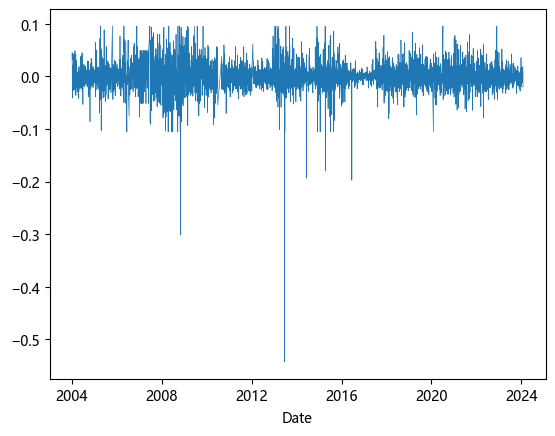

In [147]:
#收益率计算  r=lnr2-lnr1
import numpy as np
import matplotlib.pyplot as plt
val=[]
for _,value in stock_zh_a_hist_df["收盘"].items():
    val.append(value)
day=[]
for _,d in stock_zh_a_hist_df["日期"].items():
    day.append(d)
R=[]
for i in range(1, len(val)):
    temp = np.log(val[i]) - np.log(val[i - 1])
    R.append(temp)


print(len(R),len(val),len(day))


day.pop(0)
plt.plot(day, R,linewidth=0.5)

# 设置横坐标标签为日期
plt.xlabel('Date')
# 显示图形
plt.show()

In [148]:
date=stock_zh_a_hist_df['日期'].tolist()
dates=date[1:]
dates

[datetime.date(2004, 1, 5),
 datetime.date(2004, 1, 6),
 datetime.date(2004, 1, 7),
 datetime.date(2004, 1, 8),
 datetime.date(2004, 1, 9),
 datetime.date(2004, 1, 12),
 datetime.date(2004, 1, 13),
 datetime.date(2004, 1, 14),
 datetime.date(2004, 1, 15),
 datetime.date(2004, 1, 16),
 datetime.date(2004, 1, 29),
 datetime.date(2004, 1, 30),
 datetime.date(2004, 2, 2),
 datetime.date(2004, 2, 3),
 datetime.date(2004, 2, 4),
 datetime.date(2004, 2, 5),
 datetime.date(2004, 2, 6),
 datetime.date(2004, 2, 9),
 datetime.date(2004, 2, 10),
 datetime.date(2004, 2, 11),
 datetime.date(2004, 2, 12),
 datetime.date(2004, 2, 13),
 datetime.date(2004, 2, 16),
 datetime.date(2004, 2, 17),
 datetime.date(2004, 2, 18),
 datetime.date(2004, 2, 19),
 datetime.date(2004, 2, 20),
 datetime.date(2004, 2, 23),
 datetime.date(2004, 2, 24),
 datetime.date(2004, 2, 25),
 datetime.date(2004, 2, 26),
 datetime.date(2004, 2, 27),
 datetime.date(2004, 3, 1),
 datetime.date(2004, 3, 2),
 datetime.date(2004, 3, 3),

In [149]:
shouyi = pd.DataFrame(list(zip(dates, R)), columns=['日期', '收益率'])

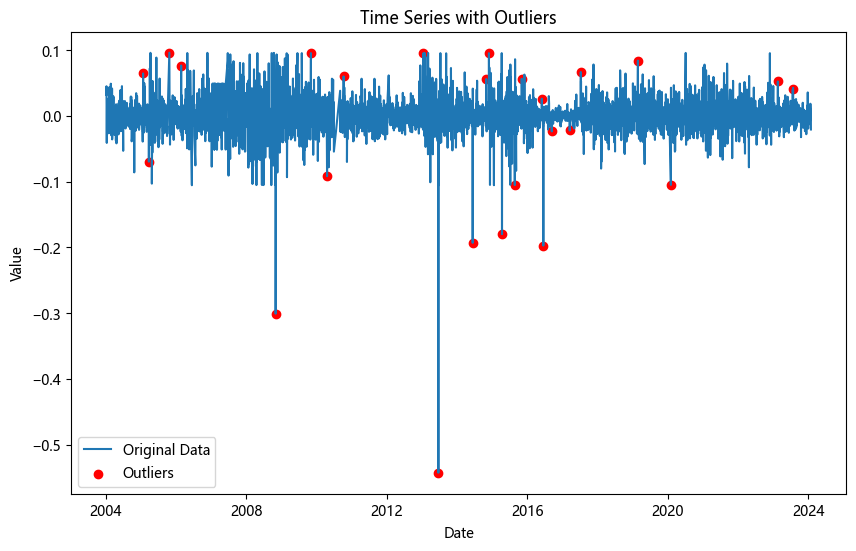

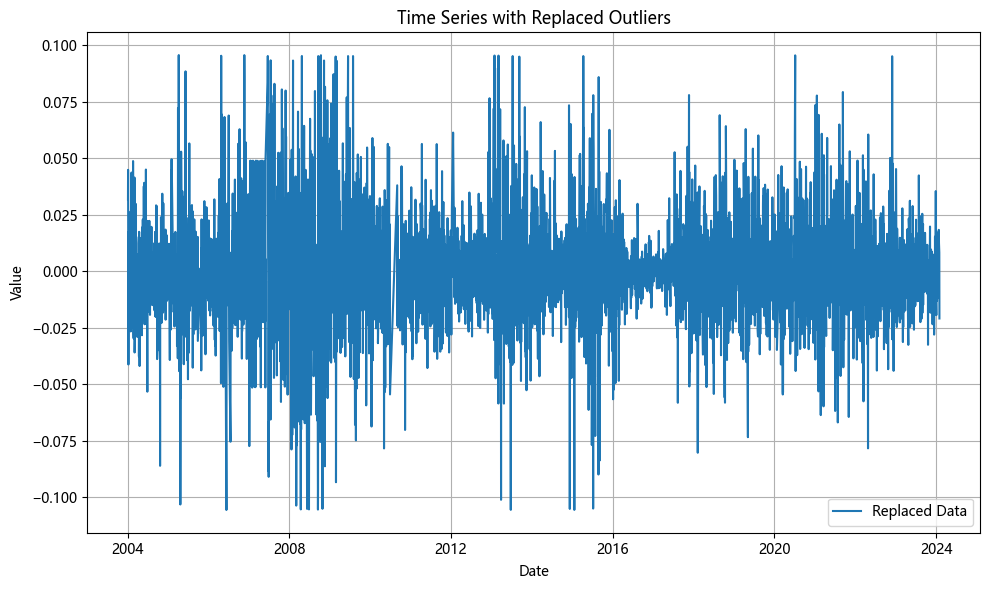

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
# 假设 shouyi 是你的 DataFrame，包含 '日期' 和 '收益率' 两列

# 使用移动平均值来识别异常值
window_size = 15
rolling_mean = shouyi['收益率'].rolling(window=window_size).mean()
std_dev = shouyi['收益率'].rolling(window=window_size).std()
lower_bound = rolling_mean - (2.9 * std_dev)
upper_bound = rolling_mean + (2.9 * std_dev)

# 标记异常值
shouyi['is_outlier'] = (shouyi['收益率'] < lower_bound) | (shouyi['收益率'] > upper_bound)

# 获取异常值的日期
outlier_dates = shouyi.loc[shouyi['is_outlier'], '日期']

# 绘制图形
plt.figure(figsize=(10, 6))

# 绘制原始数据
plt.plot(shouyi['日期'], shouyi['收益率'], label='Original Data')

# 标记异常值
plt.scatter(shouyi.loc[shouyi['is_outlier'], '日期'], shouyi.loc[shouyi['is_outlier'], '收益率'],
            color='red', label='Outliers')


plt.title('Time Series with Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
#plt.grid(True)
#plt.tight_layout()  # 自动调整子图参数，以便子图能够适应图像区域
plt.show()
outlier_dates
shouyi['replaced_value'] = shouyi['收益率']  # 创建一个新列用于存储替换后的值
shouyi.loc[shouyi['is_outlier'], 'replaced_value'] = rolling_mean[shouyi['is_outlier']]

# 绘制替换后的图形
plt.figure(figsize=(10, 6))
plt.plot(shouyi['日期'], shouyi['replaced_value'], label='Replaced Data')
plt.title('Time Series with Replaced Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Historical Volatilities (N=16):
Window 1: 0.022486
Window 2: 0.023390
Window 3: 0.021607
Window 4: 0.021653
Window 5: 0.022132
Window 6: 0.018909
Window 7: 0.020517
Window 8: 0.021379
Window 9: 0.020605
Window 10: 0.020865
Window 11: 0.020700
Window 12: 0.022550
Window 13: 0.021858
Window 14: 0.022116
Window 15: 0.023502
Window 16: 0.023176
Window 17: 0.023163
Window 18: 0.020483
Window 19: 0.020486
Window 20: 0.020539
Window 21: 0.022714
Window 22: 0.024398
Window 23: 0.024373
Window 24: 0.022885
Window 25: 0.023641
Window 26: 0.023720
Window 27: 0.023916
Window 28: 0.021765
Window 29: 0.021314
Window 30: 0.021182
Window 31: 0.020401
Window 32: 0.020581
Window 33: 0.020646
Window 34: 0.021576
Window 35: 0.022159
Window 36: 0.021927
Window 37: 0.019351
Window 38: 0.018636
Window 39: 0.017660
Window 40: 0.017670
Window 41: 0.016718
Window 42: 0.016544
Window 43: 0.016590
Window 44: 0.014921
Window 45: 0.015141
Window 46: 0.012785
Window 47: 0.012390
Window 48: 0.011526
Window 49: 0.0130

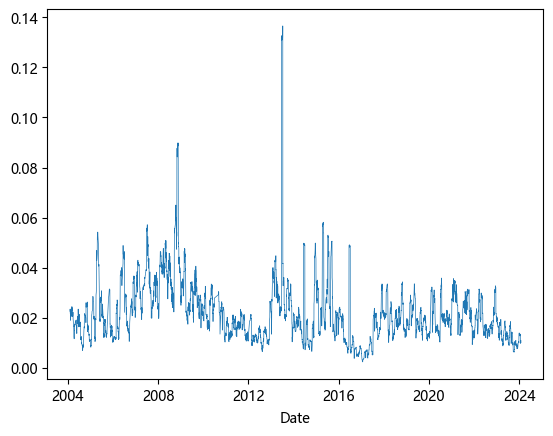

In [151]:

#N=15 历史波动率
import numpy as np

# 假设你有一个名为log_returns的对数收益率列表

# 观察期为15个时间步
N = 16
log_returns=shouyi['收益率'].tolist()
# 从第15个数据开始计算历史波动率，并将结果存储在一个列表中
historical_volatilities = []
for i in range(N - 1, len(log_returns)):
    log_returns_subset = log_returns[i-N+1:i+1]
    volatility = np.std(log_returns_subset)
    historical_volatilities.append(volatility)

# 打印结果
print("Historical Volatilities (N={}):".format(N))
for i, volatility in enumerate(historical_volatilities):
    print("Window {}: {:.6f}".format(i+1, volatility))

plt.plot(day[15:], historical_volatilities,linewidth=0.5)

# 设置横坐标标签为日期
plt.xlabel('Date')
# 显示图形
plt.show()

In [152]:
#生成新的dataframe
R1=R[15:]


stock_df = stock_zh_a_hist_df.drop(stock_zh_a_hist_df.index[:15]).drop(stock_zh_a_hist_df.index[-1])
stock_df = stock_df.reset_index(drop=True)
df2 = pd.DataFrame({'收益率': R1, '波动率': historical_volatilities})
new1_df = pd.concat([stock_df, df2], axis=1)
new1_df.to_csv('data333.csv', index=False)
new_df= new1_df.drop(new1_df.tail(21).index)
new_df.to_csv('data1.csv', index=False)
new_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,收益率,波动率
0,2004-02-04,9.88,10.01,10.08,9.85,193975,1.939010e+08,2.34,1.83,0.18,1.38,0.004983,0.022486
1,2004-02-05,10.06,10.06,10.28,9.98,174839,1.766050e+08,3.00,0.50,0.05,1.24,0.043760,0.023390
2,2004-02-06,10.08,10.51,10.98,9.88,438125,4.598170e+08,10.93,4.47,0.45,3.11,0.007583,0.021607
3,2004-02-09,10.54,10.59,10.74,10.42,196300,2.070370e+08,3.04,0.76,0.08,1.39,0.014065,0.021653
4,2004-02-10,10.65,10.74,10.95,10.51,232602,2.491090e+08,4.15,1.42,0.15,1.65,-0.011236,0.022132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,2023-12-22,9.19,9.20,9.28,9.11,1005645,9.249988e+08,1.85,0.33,0.03,0.52,-0.001088,0.010233
4689,2023-12-25,9.18,9.19,9.20,9.14,413971,3.796382e+08,0.65,-0.11,-0.01,0.21,-0.009842,0.010361
4690,2023-12-26,9.19,9.10,9.20,9.07,541896,4.937466e+08,1.41,-0.98,-0.09,0.28,0.002195,0.009946
4691,2023-12-27,9.10,9.12,9.13,9.02,641534,5.820367e+08,1.21,0.22,0.02,0.33,0.035545,0.013541


In [153]:
shouyi = pd.concat([new_df['日期'], new_df['收益率' ]], axis=1)
shouyi


,日期,收益率
0,2004-02-04,0.004983
1,2004-02-05,0.043760
2,2004-02-06,0.007583
3,2004-02-09,0.014065
4,2004-02-10,-0.011236
...,...,...
4688,2023-12-22,-0.001088
4689,2023-12-25,-0.009842
4690,2023-12-26,0.002195
4691,2023-12-27,0.035545


Selected features: ['波动率', '振幅']


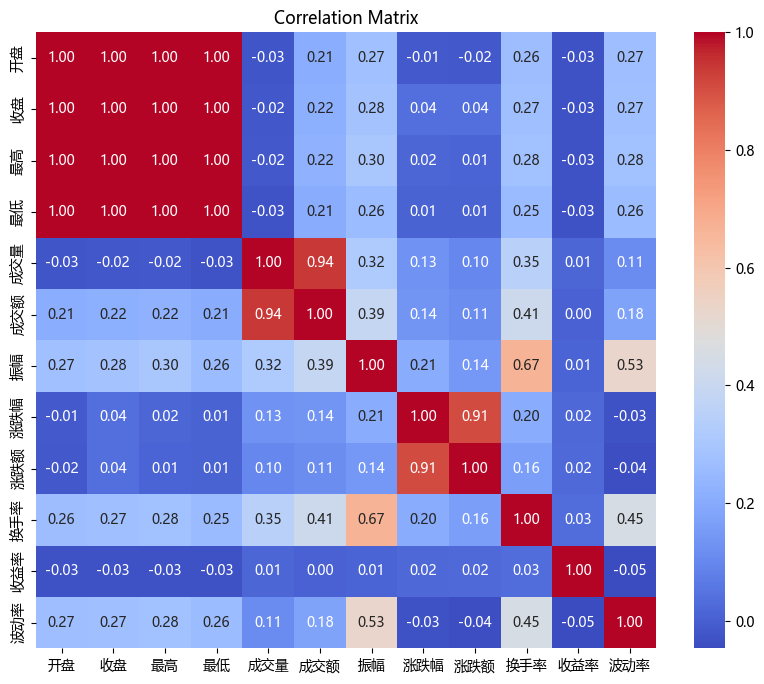

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率,收益率,波动率
0,0.113993,0.114319,0.110857,0.114395,0.036481,0.021762,0.132278,0.841416,0.715899,0.158273,0.857611,0.150484
1,0.118277,0.115483,0.115429,0.117493,0.032712,0.019749,0.169587,0.815820,0.704605,0.141487,0.918314,0.157210
2,0.118753,0.125960,0.131429,0.115110,0.084568,0.052719,0.617863,0.892225,0.739357,0.365707,0.861682,0.143941
3,0.129700,0.127823,0.125943,0.127979,0.036939,0.023292,0.171849,0.820824,0.707211,0.159472,0.871829,0.144284
4,0.132318,0.131315,0.130743,0.130124,0.044089,0.028189,0.234596,0.833526,0.713293,0.190647,0.832222,0.147843
...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.097573,0.095460,0.092571,0.096759,0.196344,0.106873,0.104579,0.812548,0.702867,0.055156,0.848109,0.059264
4689,0.097335,0.095227,0.090743,0.097474,0.079811,0.043385,0.036744,0.804080,0.699392,0.017986,0.834405,0.060221
4690,0.097573,0.093132,0.090743,0.095806,0.105006,0.056669,0.079706,0.787336,0.692441,0.026379,0.853248,0.057128
4691,0.095431,0.093597,0.089143,0.094614,0.124630,0.066947,0.068400,0.810431,0.701998,0.032374,0.905454,0.083890


In [ ]:
#皮尔逊检验
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Microsoft YaHei']
# 生成示例数据集
np.random.seed(0)
data1 = new_df.drop(columns=['日期'], inplace=False)
def min_max_scaling(dataframe):
    
    # 使用 Min-Max 标准化公式进行归一化
    normalized_df = (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())
    
    return normalized_df

data=min_max_scaling(data1)
#data 归一化矩阵
# 计算特征与目标变量之间的相关系数
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['波动率'].abs().sort_values(ascending=False)

# 选择相关性高于阈值的特征
threshold = 0.5  # 相关性阈值
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# 输出选择的特征
print("Selected features:", selected_features)

# 绘制相关系数热图
plt.figure(figsize=(10, 8))
heatmap=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)
plt.title('Correlation Matrix')
plt.show()
data

In [ ]:
#平稳性及单位根检验

from statsmodels.tsa.stattools import adfuller

# 假设 data 是你的时间序列数据
result = adfuller(historical_volatilities)

# 输出检验结果
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# 判断平稳性
if result[1] <= 0.05:
    print("时间序列是平稳的")
else:
    print("时间序列是非平稳的")



ADF Statistic: -4.955826343136947
p-value: 2.7122401357935323e-05
Critical Values: {'1%': -3.4317585936404296, '5%': -2.8621624356024813, '10%': -2.567101325023956}
时间序列是平稳的


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4678
Model:                 ARIMA(1, 1, 0)   Log Likelihood               22417.010
Date:                Tue, 07 May 2024   AIC                         -44830.019
Time:                        15:47:06   BIC                         -44817.119
Sample:                             0   HQIC                        -44825.482
                               - 4678                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0102      0.014      0.745      0.456      -0.017       0.037
sigma2      4.021e-06   1.52e-08    264.315      0.000    3.99e-06    4.05e-06
Ljung-Box (L1) (Q):                   0.00   Jarque-

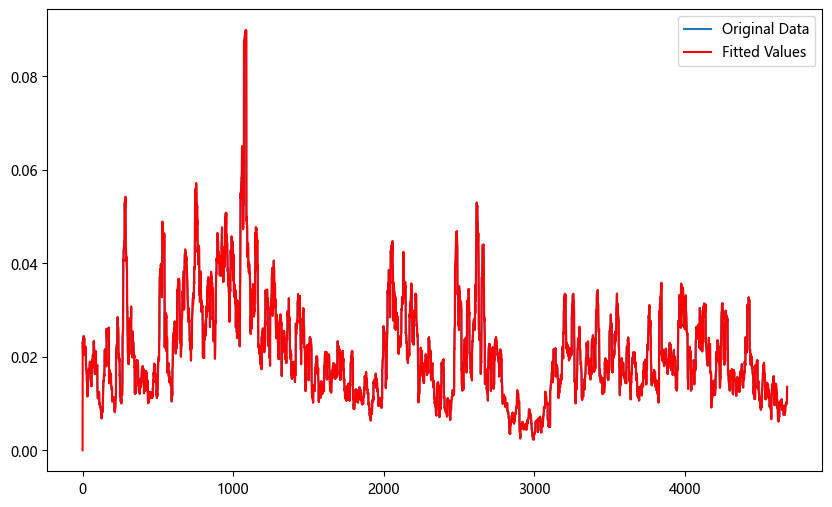

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# 将时间序列数据转换为DataFrame
ts=historical_volatilities

# 使用ARIMA模型拟合数据
model = ARIMA(ts, order=(1,1,0))  # ARIMA(p,d,q)，这里使用了AR(1)模型
results = model.fit()

# 打印模型的摘要
print(results.summary())

# 绘制原始数据和模型拟合结果
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.legend()
plt.show()

In [ ]:
# Forecast future values
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted values for the next 10 days:")
print(forecast)


Forecasted values for the next 10 days:
[0.01354154 0.01354154 0.01354154 0.01354154 0.01354154 0.01354154
 0.01354154 0.01354154 0.01354154 0.01354154]


In [ ]:
forecast

array([0.01354154, 0.01354154, 0.01354154, 0.01354154, 0.01354154,
       0.01354154, 0.01354154, 0.01354154, 0.01354154, 0.01354154])